## Day 30 Lecture 2 Assignment

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
rev = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')



In [258]:
reviews = rev.copy()
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In this assignment, you will work more independently. Perform the following steps:
    
1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [259]:
reviews.isnull().sum()*100/reviews.isnull().count()


App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [260]:
categorical = reviews.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

App
9660
Category
34
Reviews
6002
Size
462
Installs
22
Type
3
Price
93
Content Rating
6
Genres
120
Last Updated
1378
Current Ver
2832
Android Ver
33


In [261]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
reviews["Rating"].fillna(reviews["Rating"].mean(), inplace=True)
reviews["Type"].fillna('Free', inplace=True)
reviews["Content Rating"].fillna('Unrated', inplace=True)
reviews["Current Ver"].fillna('1.0.0', inplace=True)
reviews["Android Ver"].fillna('Varies with device', inplace=True)

In [249]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [250]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
# Convert ID and Interest Rate to numeric.
#y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')

#reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')

reviews['Rating'] = np.where(reviews['Rating'] > 4.5, 1,0)
reviews['Price'] = pd.to_numeric(reviews['Price'].str.strip('$'), errors='coerce')
#reviews['Installs'] = pd.to_numeric(reviews['Installs'].str.strip('[,+]'), errors='coerce')

reviews['Installs'] = reviews['Installs'].str.replace('[,+]','')
reviews['Installs'] = pd.to_numeric(reviews['Installs'], errors='coerce')


reviews['Reviews'] = pd.to_numeric(reviews['Reviews'].str.strip('M'), errors='coerce')


#reviews["Reviews"] = reviews["Reviews"].astype(float)


# Drop other columns with many unique variables
reviews.drop(['App', 'Size', 
            'Last Updated', 'Current Ver'], 1, inplace=True)

In [0]:
reviews["Price"].fillna(reviews["Price"].mean(), inplace=True)
reviews["Installs"].fillna(reviews["Installs"].mean(), inplace=True)


In [265]:
reviews.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver
0,ART_AND_DESIGN,0,159.0,10000.0,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,ART_AND_DESIGN,0,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,ART_AND_DESIGN,1,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,4.0.3 and up
3,ART_AND_DESIGN,0,215644.0,50000000.0,Free,0.0,Teen,Art & Design,4.2 and up
4,ART_AND_DESIGN,0,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


In [266]:
reviews.tail()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver
10836,FAMILY,0,38.0,5000.0,Free,0.0,Everyone,Education,4.1 and up
10837,FAMILY,1,4.0,100.0,Free,0.0,Everyone,Education,4.1 and up
10838,MEDICAL,0,3.0,1000.0,Free,0.0,Everyone,Medical,2.2 and up
10839,BOOKS_AND_REFERENCE,0,114.0,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device
10840,LIFESTYLE,0,398307.0,10000000.0,Free,0.0,Everyone,Lifestyle,Varies with device


In [267]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
Category          10841 non-null object
Rating            10841 non-null int64
Reviews           10841 non-null float64
Installs          10841 non-null float64
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 762.4+ KB


In [268]:
categorical = reviews.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Category
34
Type
3
Content Rating
6
Genres
120
Android Ver
33


In [269]:
pd.get_dummies(reviews)

,Rating,Reviews,Installs,Price,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_0,Type_Free,...,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Android Ver_1.0 and up,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 - 7.1.1,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,Android Ver_3.0 and up,Android Ver_3.1 and up,Android Ver_3.2 and up,Android Ver_4.0 and up,Android Ver_4.0.3 - 7.1.1,Android Ver_4.0.3 and up,Android Ver_4.1 - 7.1.1,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_4.4W and up,Android Ver_5.0 - 6.0,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,0,159.0,10000.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,967.0,500000.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,87510.0,5000000.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,215644.0,50000000.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,967.0,100000.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,38.0,5000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10837,1,4.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10838,0,3.0,1000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10839,0,114.0,1000.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [270]:
reviews.isnull().sum()*100/reviews.isnull().count()

Category          0.0
Rating            0.0
Reviews           0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Android Ver       0.0
dtype: float64

In [271]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
Category          10841 non-null object
Rating            10841 non-null int64
Reviews           10841 non-null float64
Installs          10841 non-null float64
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 762.4+ KB




---
Below is what was requested for this assignment. I saw Coby and Tavonia's solution so I was interested to see if I could plug their code in and run it. 
---





In [272]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = reviews.drop('Rating', 1)
Y = reviews['Rating']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.83041475, 0.77767528, 0.78874539, 0.81273063, 0.82841328,
       0.80719557, 0.79428044, 0.7998155 , 0.80904059, 0.81273063])



---



---
Below is copied and pasted from Coby's and Tavonia's solution, I wanted to see what numbers I got when I ran my model through his Confusion Matrix and Grid Search. The cool thing is it ran with no hitches! 


---


My results in the Confusion Matrix and different and I am not sure what that means for my model. I converted a few more features to Numeric and maybe that explains the difference.

---



---




In [274]:
dum_reviews = pd.get_dummies(reviews, drop_first=True)
dum_reviews.shape

(10841, 195)

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = dum_reviews.drop('Rating', axis=1)
y = dum_reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

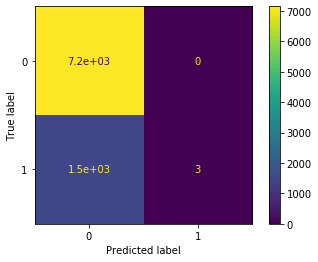

In [276]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_train, y_train)

In [277]:
from sklearn.model_selection import GridSearchCV
import math
param_grid = {'max_depth': [4,8,16], 'max_features': [int(math.sqrt(len(X.columns))), int(math.log(len(X.columns)))]}
gs = GridSearchCV(rf, param_grid=param_grid)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8266832862997717
{'max_depth': 16, 'max_features': 13}


0.8197325956662056


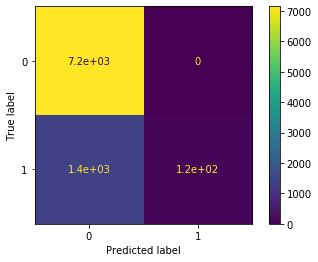

In [278]:
X = dum_reviews.drop('Rating', axis=1)
y = dum_reviews['Rating']

rf = RandomForestClassifier(max_depth=gs.best_params_['max_depth'], max_features=gs.best_params_['max_features'])
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))
plot_confusion_matrix(rf, X_train, y_train)